<a href="https://colab.research.google.com/github/AliSalimkhani/DeepNN_Course2025/blob/main/DeepNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepNN  
**Ali Salimkhani**   
**401463141**  


In [18]:
#defining matrices using numpy
import numpy as np
x = np.array([[1,2]])
w = np.array([[2],[3]])
b = np.array([1])

print(f"bias:\n {b}\n\n")
print(f"weight:\n {w}\n\n")
print(f"input:\n {x}\n\n")

bias:
 [1]


weight:
 [[2]
 [3]]


input:
 [[1 2]]




In [19]:
#matrix multiplication using numpy
y = x @ w + b
target = 10
loss = np.mean((y-target)**2)

print(y)
print(loss)

[[9]]
1.0


In [20]:
#defining matrices using torch
import torch
x = torch.tensor([[1.0,2.0]] , requires_grad=True)
w = torch.tensor([[2.0],[3.0]] , requires_grad=True)
b = torch.tensor([1])

print(f"bias:\n {b}\n\n")
print(f"weight:\n {w}\n\n")
print(f"input:\n {x}\n\n")

bias:
 tensor([1])


weight:
 tensor([[2.],
        [3.]], requires_grad=True)


input:
 tensor([[1., 2.]], requires_grad=True)




In [21]:
#tensor multiplication and backpropagation
y = x @ w + b
y.backward()
print("dy/dw= ", w.grad)
print("dy/db= " , b.grad)
print(y)

dy/dw=  tensor([[1.],
        [2.]])
dy/db=  None
tensor([[9.]], grad_fn=<AddBackward0>)


<function matplotlib.pyplot.show(close=None, block=None)>

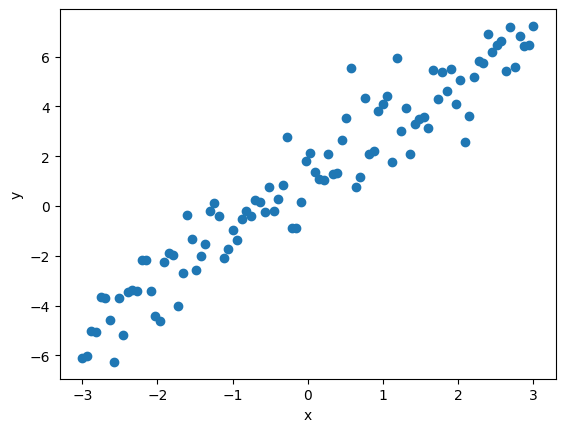

In [42]:

#creating data
torch.manual_seed(0)
x = torch.linspace(-3,3,100).unsqueeze(1)

y = 2*(x) + 1 + torch.randn(x.size())


import matplotlib.pyplot as plt
# Convert to numpy for plotting
x_np = x.numpy()
y_np = y.numpy()


# Plot
plt.scatter(x_np, y_np)
plt.xlabel("x")
plt.ylabel("y")
plt.show

y =  1.9995545148849487 x +  1.0371382236480713


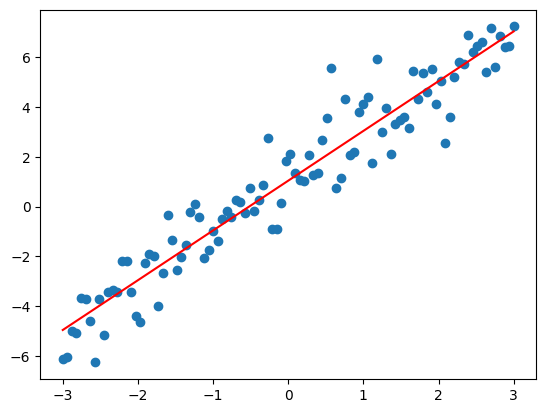

In [50]:
#defining tensors & loss calculation & Bakcpropagation & Updating weights for (2x + 1)
w = torch.randn(1,1 , requires_grad=True)
b = torch.zeros(1,requires_grad=True)
losses = []
learning_rate = 0.01
for epoch in range(1000):
    y_predicted = x @ w + b
    loss = torch.mean((y_predicted - y)**2)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    w.grad.zero_()
    b.grad.zero_()

print("y = " , w.item(),"x + " , b.item())

# Convert to numpy for plotting
x_np = x.numpy()
y_np = y.numpy()

w_np = w.detach().numpy()
b_np = b.detach().numpy()

# Plot
import matplotlib.pyplot as plt

plt.scatter(x_np, y_np)
plt.plot(x_np, x_np * w_np + b_np ,color = "red")
plt.show()



In [53]:
#doing the same thing but this time using torch
from torch import nn

model = nn.Linear(1,1)
opt = torch.optim.SGD(model.parameters(),lr=0.01)
loss_funcion = nn.MSELoss()
for epoch in range(1000):
    y_predicted2 = model(x)
    loss = loss_funcion(y_predicted2 , y)
    opt.zero_grad()
    loss.backward()
    opt.step()

print("Learned W and b" , [p.data for p in model.parameters()])

Learned W and b [tensor([[1.9996]]), tensor([1.0371])]
